## **Name: Vaishnavi Anand Mali**
LetsGrowMore- Virtual Internship Program

*Beginner Level Task*

Task 1: Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:
import pandas_datareader as pdr
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
#Loading the Dataset
stock = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df=stock.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


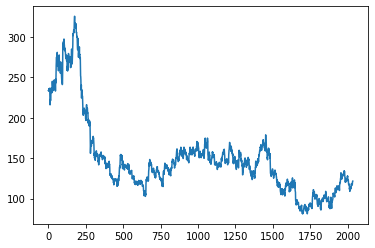

In [5]:
d_close = df['Close']
plt.plot(d_close)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting into Training and Testing data

In [7]:
training_size=int(len(d_close)*0.72)
test_size=len(d_close)-training_size
train_data=d_close[0:training_size,:]
test_data=d_close[training_size:len(d_close),:1]

In [8]:
def create_dataset(dataset, time_step=1):
  x_data= []
  y_data= []
  for i in range(len(dataset)-time_step-1):
    x_data.append(dataset[i:(i+time_step), 0])
    y_data.append(dataset[i + time_step, 0])
  return np.array(x_data), np.array(y_data)

In [9]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [10]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [11]:
x_train.shape

(1364, 100, 1)

In [12]:
y_train.shape

(1364,)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))

In [16]:
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 10s 239ms/step - loss: 0.0314 - val_loss: 0.0049
Epoch 2/100
22/22 [==============================] - 4s 183ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 3/100
22/22 [==============================] - 4s 181ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/100
22/22 [==============================] - 5s 230ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
22/22 [==============================] - 4s 183ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
22/22 [==============================] - 4s 181ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
22/22 [==============================] - 4s 187ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
22/22 [==============================] - 6s 292ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
22/22 [==============================] - 4s 181ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
22/22 [==============================] - 6s 253ms/step - loss: 0.0010 - val_l

In [17]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

164.86775561863595

In [20]:
math.sqrt(mean_squared_error(y_test,test_predict))

107.08947990840764

In [21]:
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [22]:
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

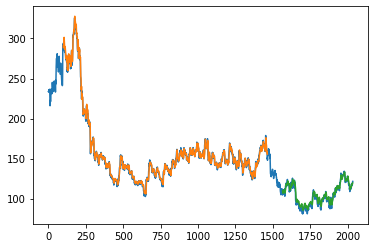

In [23]:
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [24]:
len(test_data), x_test.shape

(570, (469, 100, 1))

In [25]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

In [27]:
lt_output=[]
n_steps=100
next_No_Of_Days = 50
i=0

while(i<next_No_Of_Days):
    
    if(len(tem_input)>100):
        x_input=np.array(tem_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yt = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yt))
        tem_input.extend(yt[0].tolist())
        tem_input=tem_input[1:]
        lt_output.extend(yt.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yt = regressor.predict(x_input, verbose=0)
        print(yt[0])
        tem_input.extend(yt[0].tolist())
        print(len(tem_input))
        lt_output.extend(yt.tolist())
        i=i+1
    

print(lt_output)

[0.165811]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.1

In [28]:
df = d_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()